<a href="https://colab.research.google.com/github/ashishgeddam2002/data-science-assignment-excelr/blob/main/clustering_analysis_assginment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Configuration for the environment
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
df =pd.read_csv("EastWestAirlines.csv")

In [ ]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
# Descriptive statistics
df.describe(include='all')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [ ]:
# Dropping the irrelevant data columns
df.drop(columns=['ID#', 'Qual_miles'], inplace=True)
df.head(2)

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,1,1,174,1,0,0,7000,0
1,19244,1,1,1,215,2,0,0,6968,0


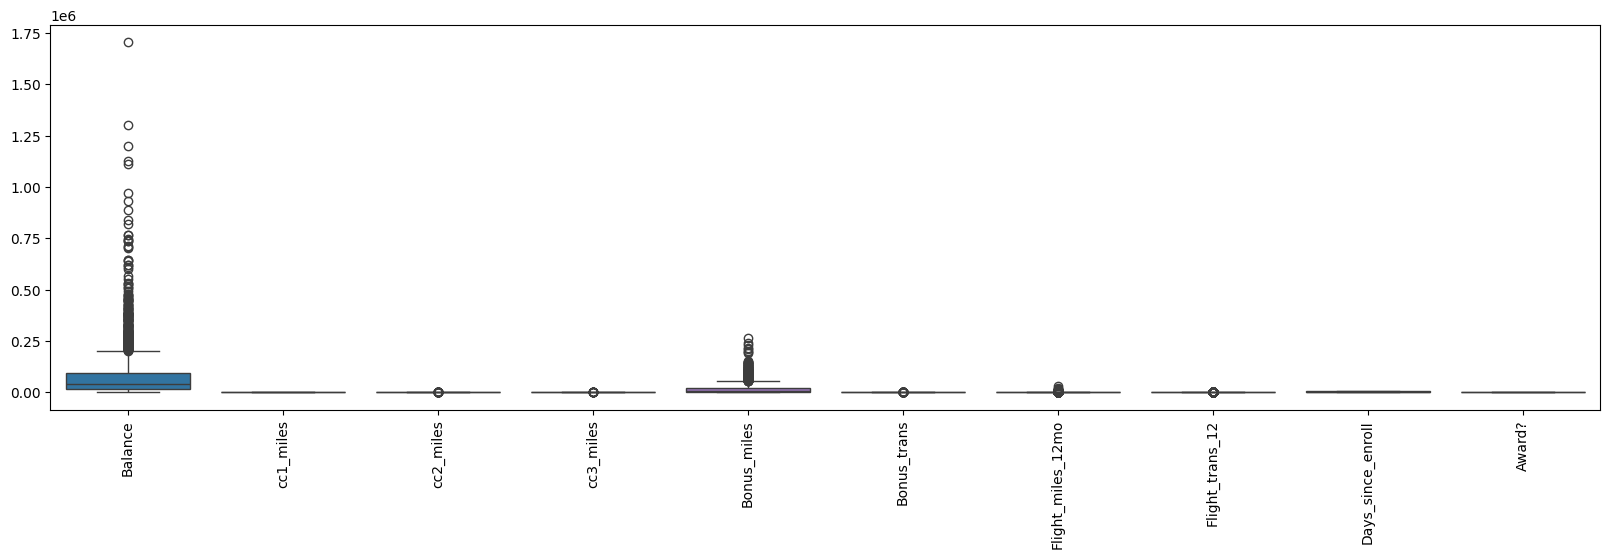

In [ ]:
# Univariate Analysis: Boxplot visualization for outliers detection of numerical data
plt.figure(figsize=(20, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

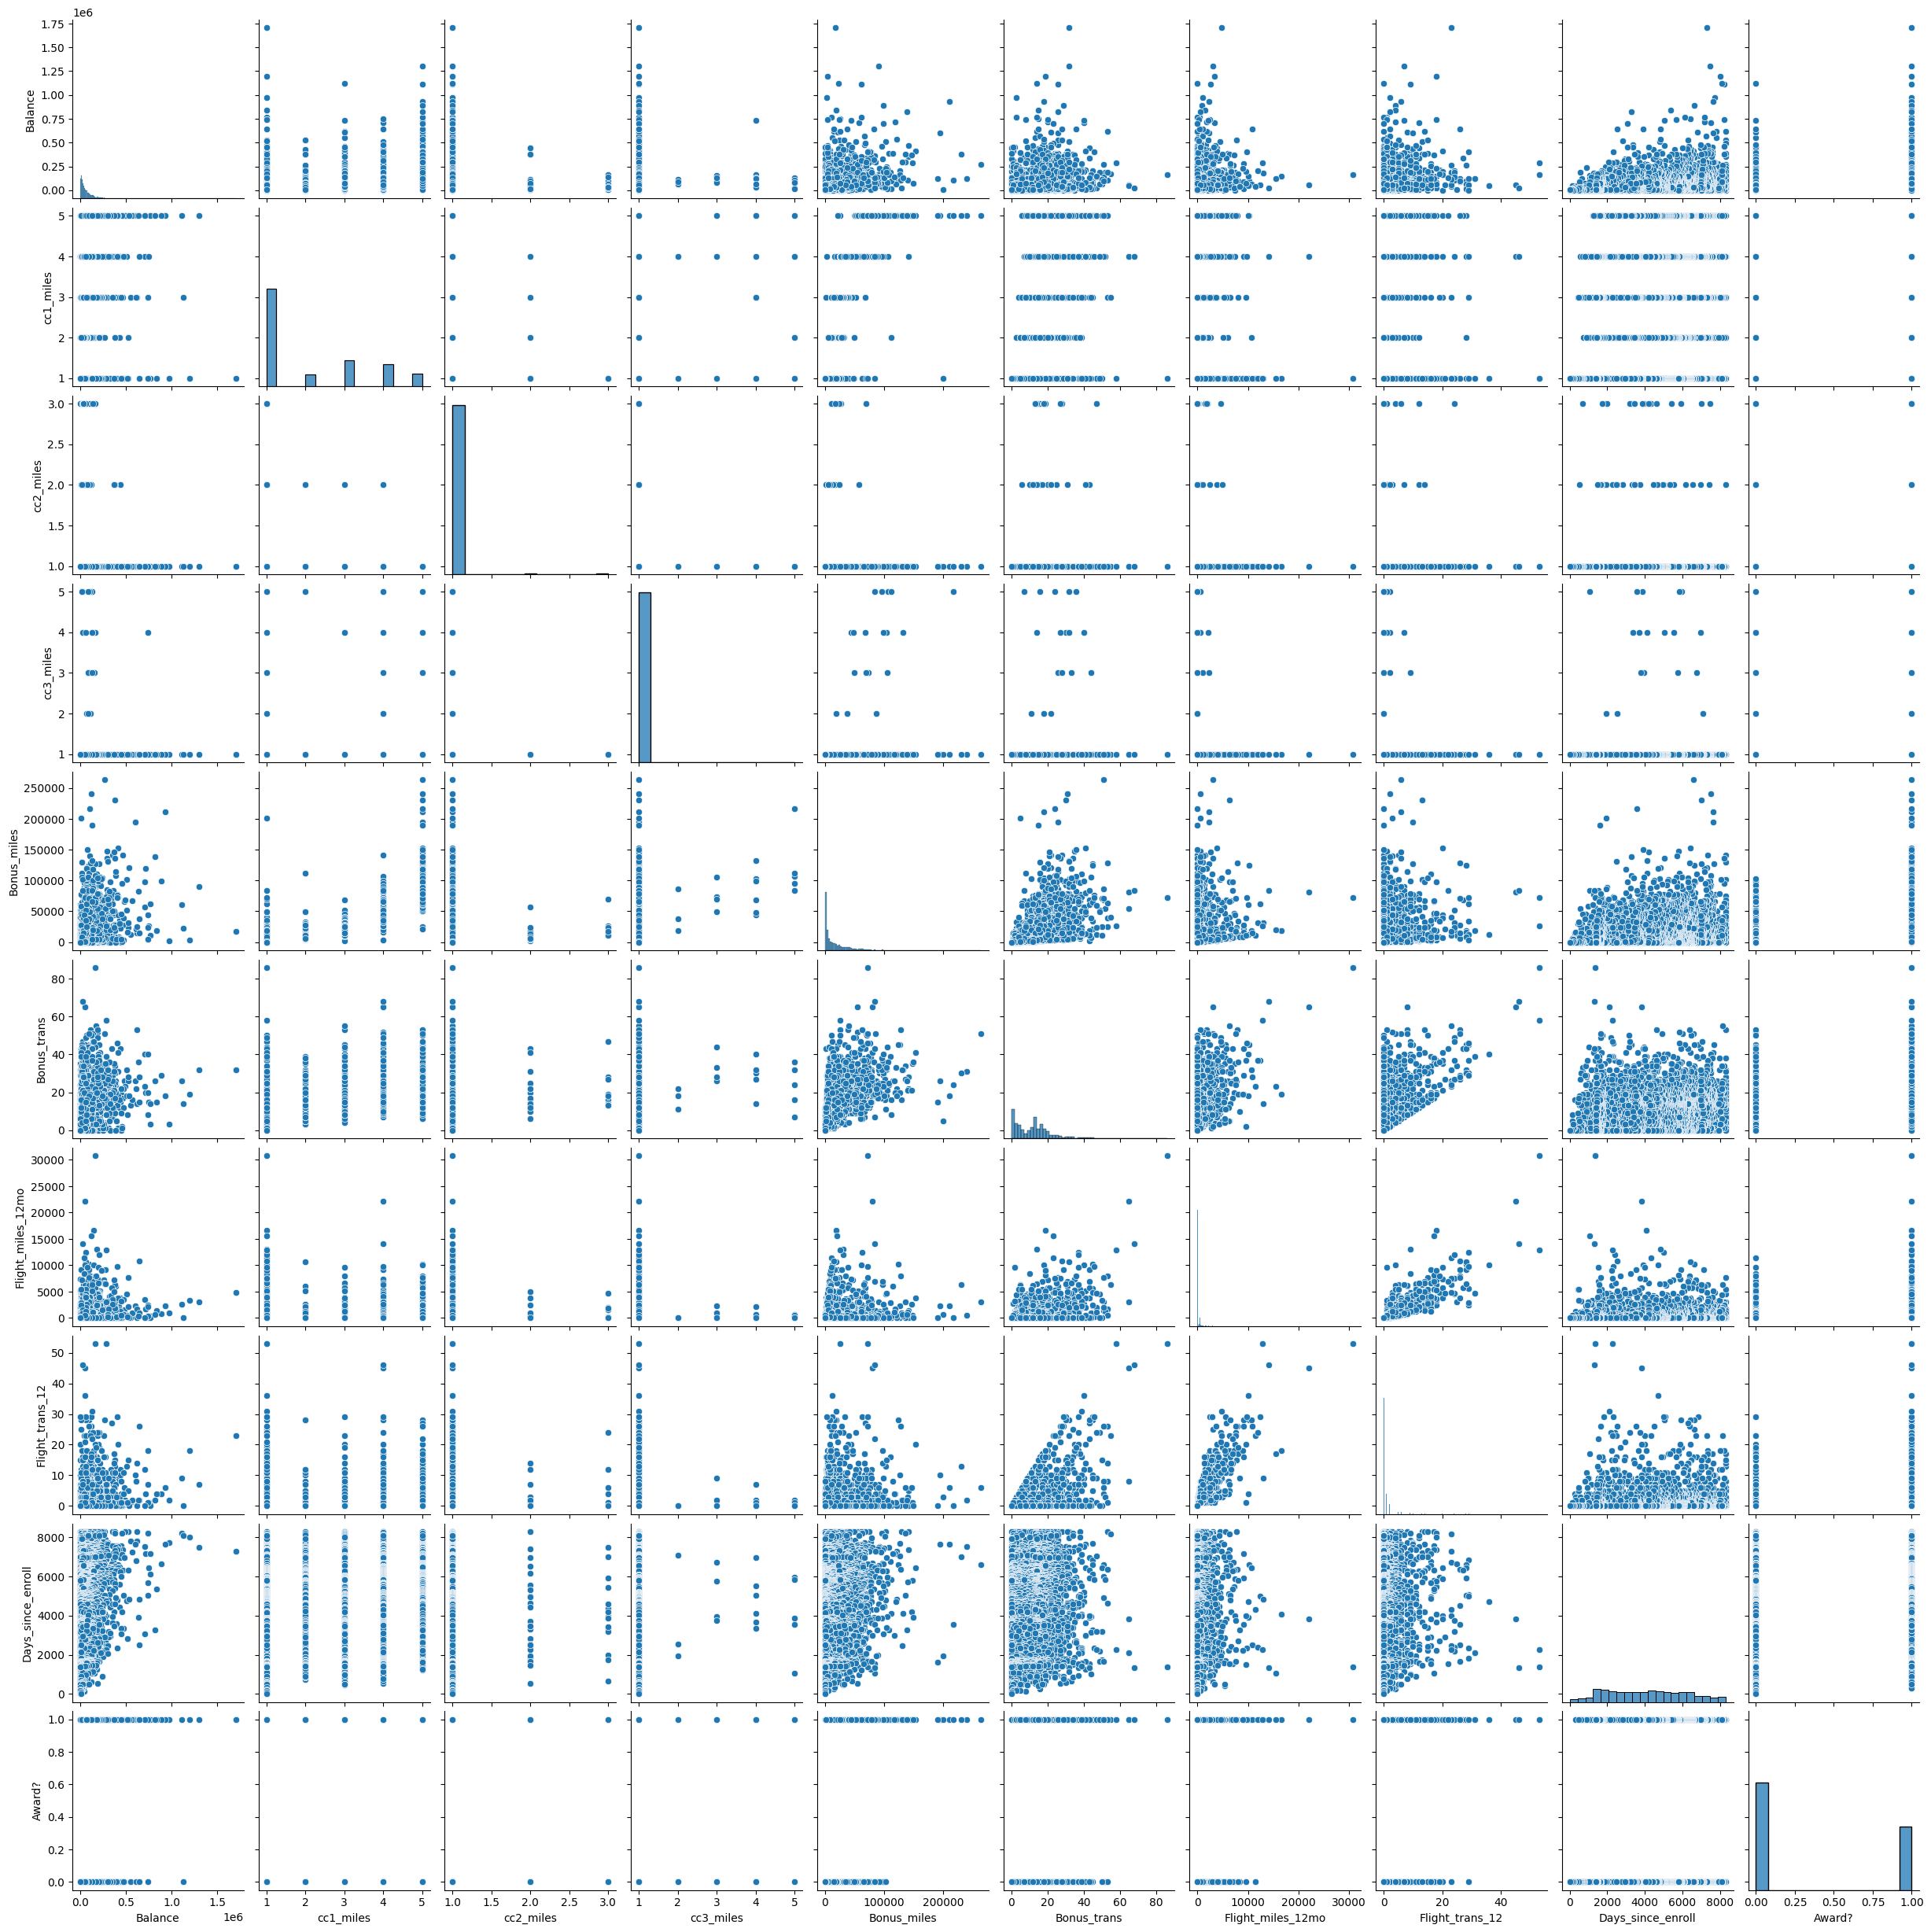

In [ ]:
# Pair Plot for visualizing the numerical data's relationship between each other
sns.pairplot(df)

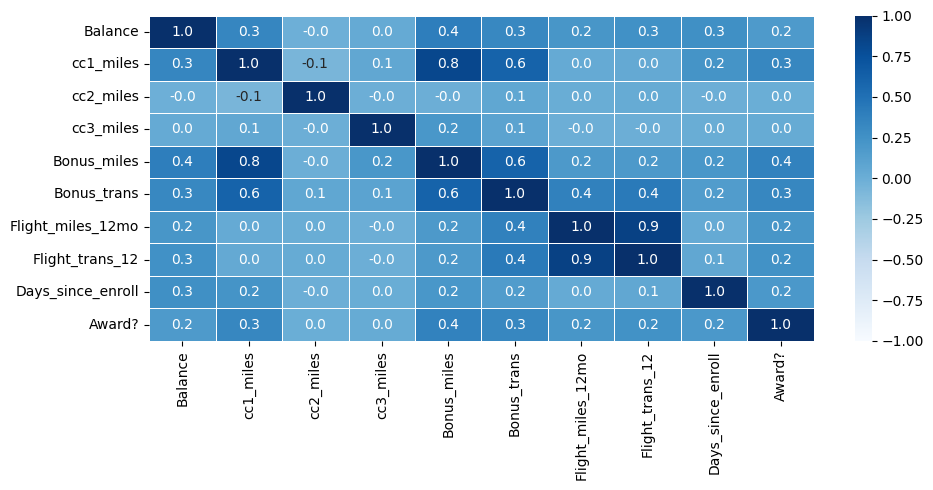

In [ ]:
# Multivariate Analysis: Correlation heatmap
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.1f', center=0, vmin=-1, vmax=1, linewidths=.5)
plt.tight_layout()
plt.show()

In [ ]:
# Treating Outliers detected in the previous Box Plot
def treat_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower, data[col]))

treat_outliers(df, df.columns)

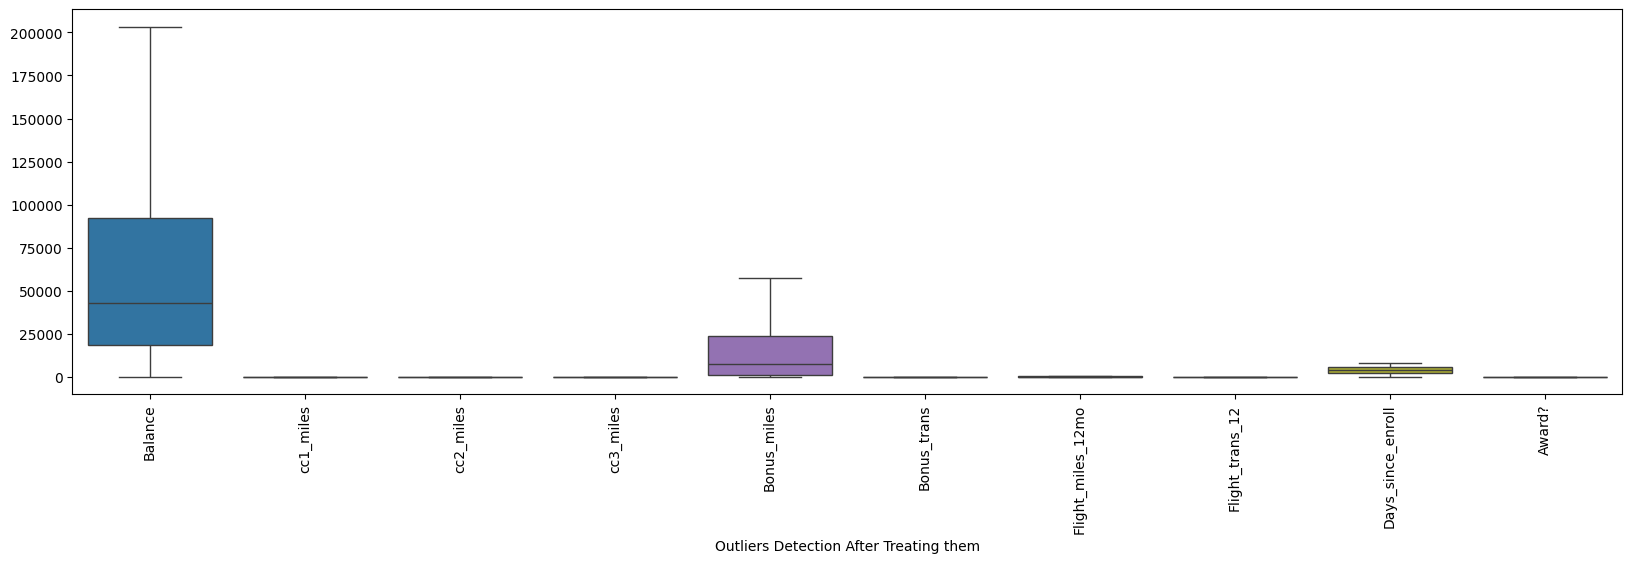

In [ ]:
# Check if the outliers treated are gone completely
plt.figure(figsize=(20, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.xlabel("Outliers Detection After Treating them")
plt.show()

In [ ]:
# Mapping the values as given in the dataset
mapping = {1: 'under 5,000',
           2: '5,000 - 10,000',
           3: '10,001 - 25,000',
           4: '25,001 - 50,000',
           5: 'over 50,000'}

df['cc1_miles'] = df['cc1_miles'].map(mapping)
df['cc2_miles'] = df['cc2_miles'].map(mapping)
df['cc3_miles'] = df['cc3_miles'].map(mapping)
df.head(3)

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,"under 5,000","under 5,000","under 5,000",174.0,1.0,0.0,0.0,7000.0,0.0
1,19244.0,"under 5,000","under 5,000","under 5,000",215.0,2.0,0.0,0.0,6968.0,0.0
2,41354.0,"under 5,000","under 5,000","under 5,000",4123.0,4.0,0.0,0.0,7034.0,0.0


In [ ]:
# Encoding the values to get the data into numerical format
df = pd.get_dummies(df, columns=['cc1_miles', 'cc2_miles', 'cc3_miles'], dtype=int)
df.head(2)

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,"cc1_miles_10,001 - 25,000","cc1_miles_25,001 - 50,000","cc1_miles_5,000 - 10,000","cc1_miles_over 50,000","cc1_miles_under 5,000","cc2_miles_under 5,000","cc3_miles_under 5,000"
0,28143.0,174.0,1.0,0.0,0.0,7000.0,0.0,0,0,0,0,1,1,1
1,19244.0,215.0,2.0,0.0,0.0,6968.0,0.0,0,0,0,0,1,1,1


In [ ]:
# Feature Scaling: Standardizing the data for further Model building
sc = StandardScaler()
scaled_df = sc.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

<Axes: xlabel='PC1', ylabel='PC2'>

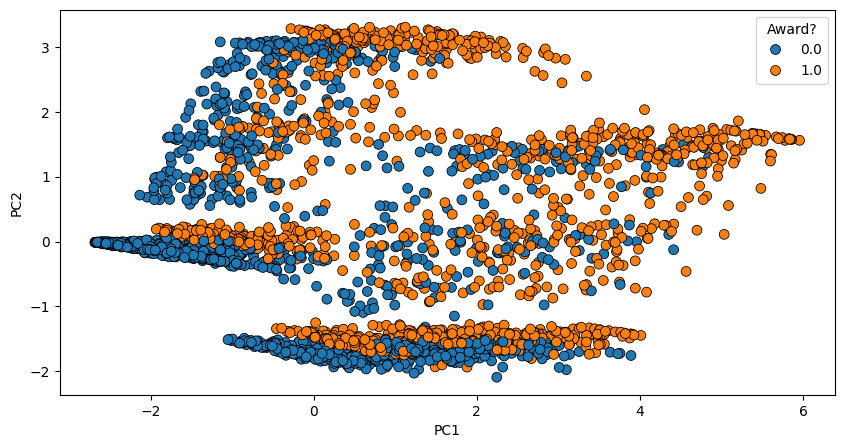

In [ ]:
# Principal Component Analysis (PCA)
pc = PCA(n_components=2)
pc_data = pc.fit_transform(scaled_df)
data = pd.DataFrame(pc_data, columns=['PC1', 'PC2'])
sns.scatterplot(x=data['PC1'], y=data['PC2'], s=50, edgecolor='black', hue=df['Award?'])

In [ ]:
# KMeans Clustering
km = KMeans()
ypred = km.fit_predict(data)

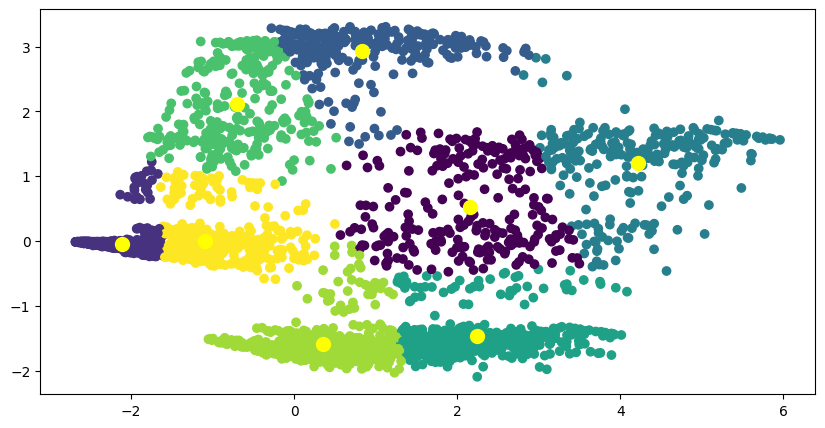

In [ ]:
# Plotting the clusters
plt.scatter(data['PC1'], data['PC2'], c=ypred, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='yellow', s=100)
plt.show()

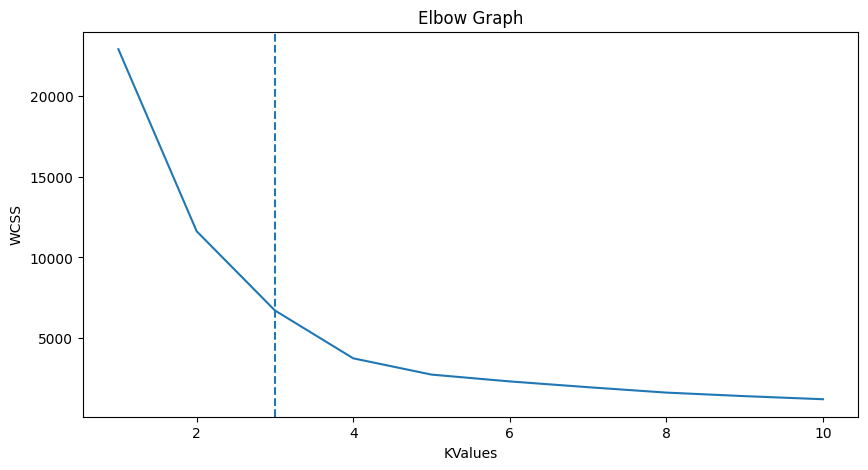

In [ ]:
# Elbow Graph to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Graph")
plt.xlabel('KValues')
plt.ylabel('WCSS')
plt.axvline(x=3, linestyle='--')
plt.show()

In [ ]:
# Apply KMeans with the optimal number of clusters (e.g., 4)
km = KMeans(n_clusters=4)
ypred = km.fit_predict(data)

In [ ]:
# Silhouette Score Analysis for KMeans
for i in range(2, 11):
    km = KMeans(n_clusters=i)
    y_pred = km.fit_predict(data)
    print(f"Silhouette Score for {i} Cluster: {silhouette_score(data, y_pred)}")

Silhouette Score for 2 Cluster: 0.4966124698634368
Silhouette Score for 3 Cluster: 0.5578468426088591
Silhouette Score for 4 Cluster: 0.5992039146192953
Silhouette Score for 5 Cluster: 0.5747764282951132
Silhouette Score for 6 Cluster: 0.507512691587384
Silhouette Score for 7 Cluster: 0.5043517153766872
Silhouette Score for 8 Cluster: 0.4940493979849678
Silhouette Score for 9 Cluster: 0.4794119281661419
Silhouette Score for 10 Cluster: 0.4919084262688614


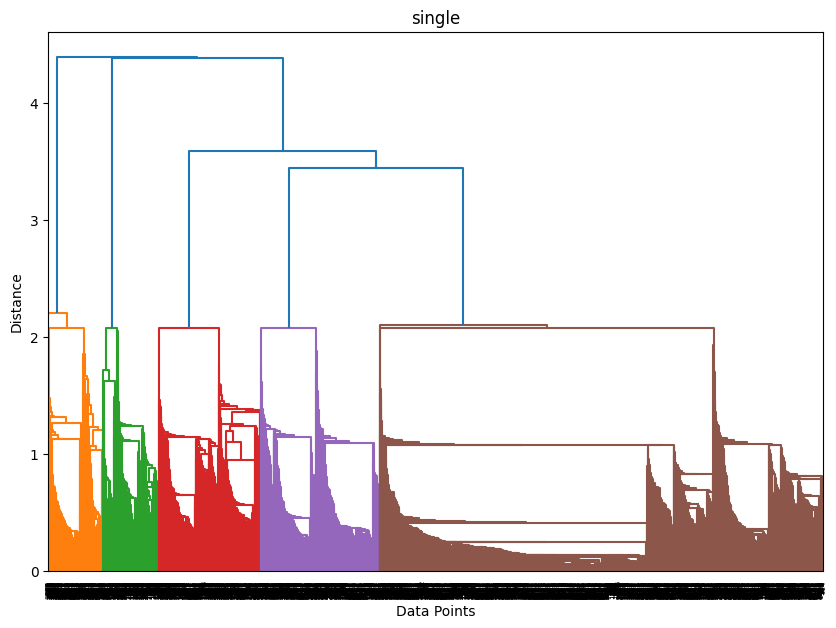

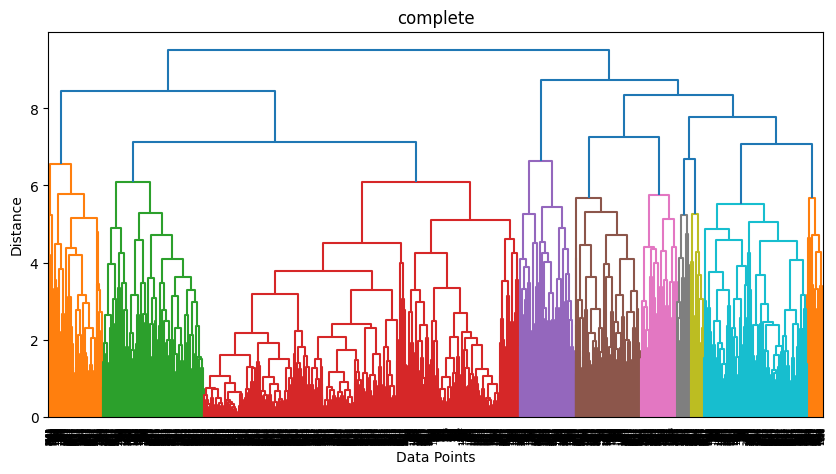

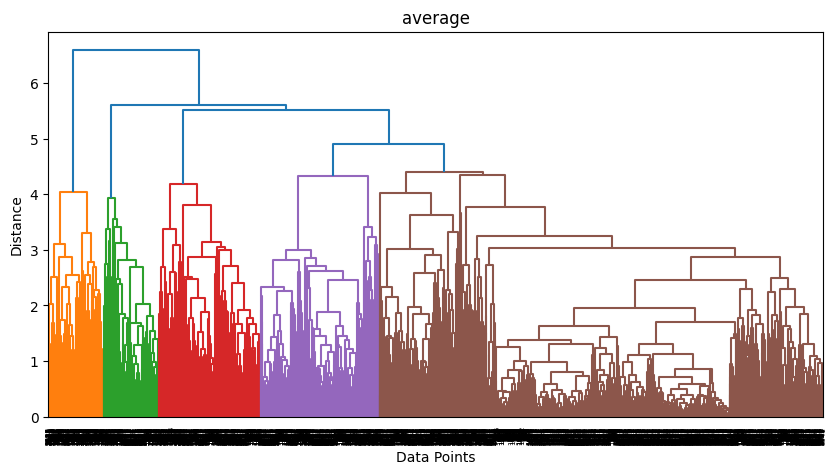

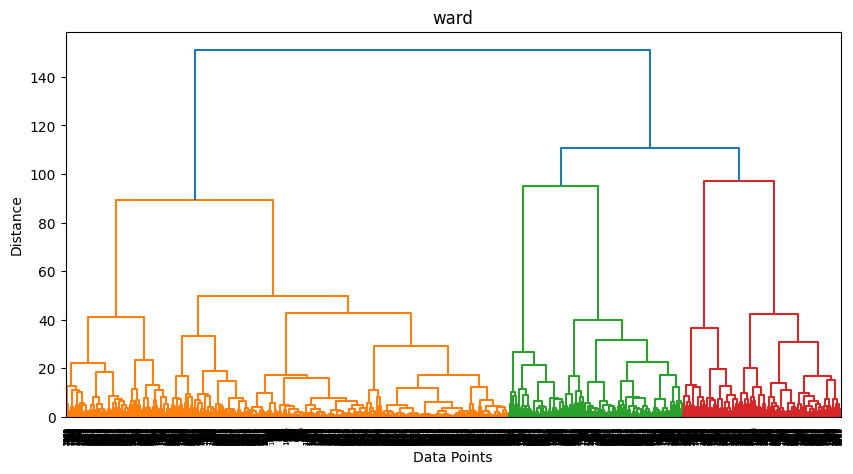

In [ ]:
# Agglomerative Clustering
linkages = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(10, 7))
for method in linkages:
    lk = hierarchy.linkage(scaled_df, method=method)
    hierarchy.dendrogram(lk)
    plt.title(method)
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

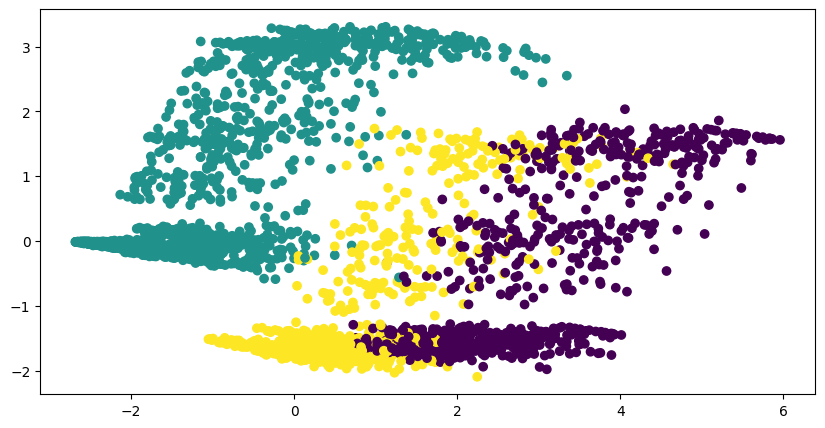

In [ ]:
# Apply Agglomerative Clustering with Ward linkage
hc = AgglomerativeClustering(n_clusters=3)
yp = hc.fit_predict(scaled_df)
plt.scatter(data['PC1'], data['PC2'], c=yp)

Silhouette Score for DBSCAN: -0.028198770872296944


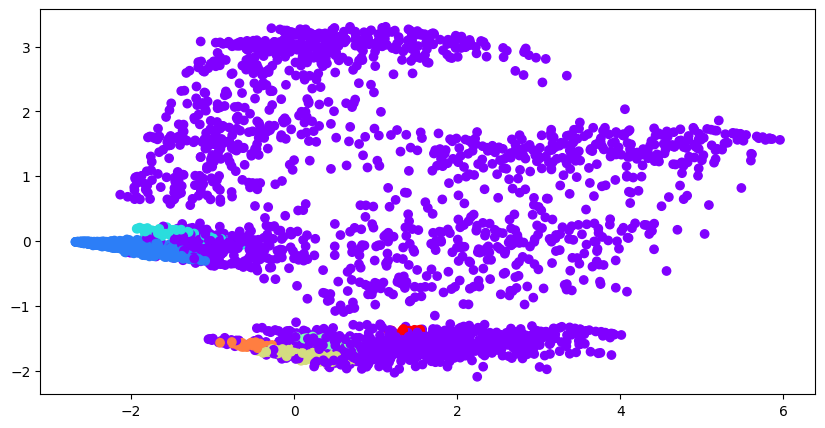

In [ ]:
# DBSCAN Clustering
db = DBSCAN(eps=0.5, min_samples=13)
y_db = db.fit_predict(scaled_df)
print(f"Silhouette Score for DBSCAN: {silhouette_score(scaled_df, y_db)}")
plt.scatter(data['PC1'], data['PC2'], c=y_db, cmap='rainbow')

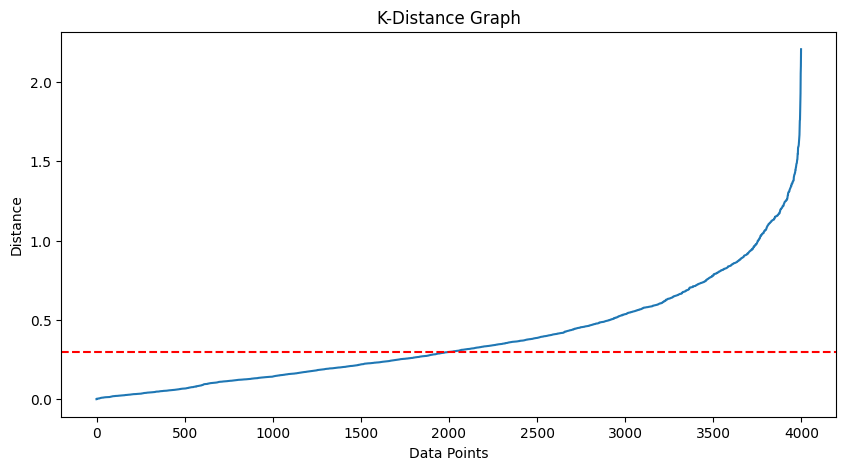

In [ ]:
# Hyperparameter Tuning for DBSCAN
neigh = NearestNeighbors(n_neighbors=3).fit(scaled_df)
d, _ = neigh.kneighbors(scaled_df)
distance = np.sort(d[:, 1])
plt.plot(distance)
plt.axhline(y=0.3, linestyle='--', color='red')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('K-Distance Graph')
plt.show()

Optimized Silhouette Score for DBSCAN: 0.1297097694228967


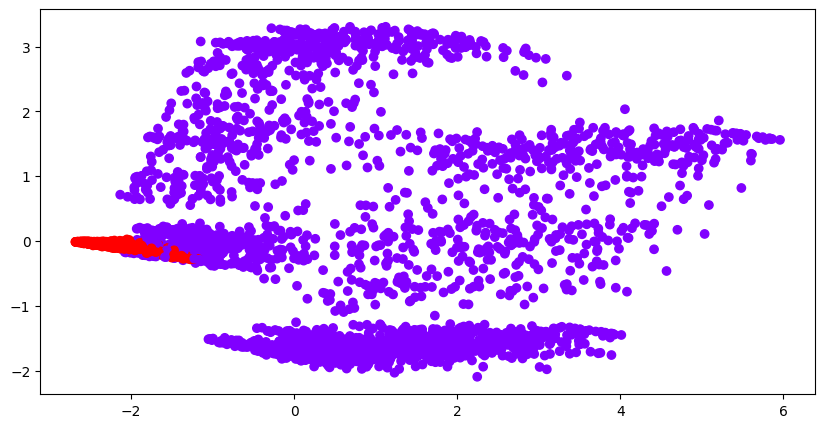

In [ ]:
# Re-run DBSCAN with optimized epsilon and min_samples
db = DBSCAN(eps=0.5, min_samples=24)
y_db_optimized = db.fit_predict(scaled_df)
print(f"Optimized Silhouette Score for DBSCAN: {silhouette_score(scaled_df, y_db_optimized)}")
plt.scatter(data['PC1'], data['PC2'], c=y_db_optimized, cmap='rainbow')

In [ ]:
# Analyze the clusters
df['cluster'] = y_db_optimized
df['cluster'].value_counts()
df.groupby('cluster').agg('mean')

,Balance,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,"cc1_miles_10,001 - 25,000","cc1_miles_25,001 - 50,000","cc1_miles_5,000 - 10,000","cc1_miles_over 50,000","cc1_miles_under 5,000","cc2_miles_under 5,000","cc3_miles_under 5,000"
cluster,,,,,,,,,,,,,,
-1,81054.519781,21195.978100,14.507594,251.516955,0.83557,4411.957612,0.523137,0.216531,0.185447,0.100318,0.101731,0.395973,1.0,1.0
0,21871.086473,1388.440068,4.109589,0.000000,0.00000,3407.420377,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0


Here are the conciseconclusions based on the analysis:
Data Preprocessing: Outliers were detected and treated, ensuring the data was cleaned. Categorical variables were encoded, and feature scaling was applied to standardize the data.

PCA: Principal Component Analysis (PCA) was used to reduce dimensionality, helping in visualizing the data in two dimensions.

KMeans Clustering: The Elbow method suggested 3 clusters as optimal. KMeans performed well, with a decent silhouette score indicating well-separated clusters.

Agglomerative Clustering: Different linkage methods were tested. The Ward method produced the best results with clear hierarchical structure.

DBSCAN: The initial DBSCAN clustering had a low silhouette score. After hyperparameter tuning, the silhouette score improved, indicating better cluster formation.

Cluster Analysis: The clusters were analyzed for patterns and characteristics, which can be used for further insights into customer segmentation.